### Data Exploration and Analysis Workflow
1. Acquiring data: first-hand vs second-hand
2. Cleaning data
3. Exploring data
4. Analyzing data
5. Drawing conclusions
6. Documenting your conclusions (data source, data size etc.)

### Some common questions you may ask: 
- What do you want to know? 
- Are there other related questions to aid your exploration?
- Those questions might point you in a direction where you find a story. If not, they might lead to other interesting questions. Even if you can’t answer your initial question, you can reach a greater understanding of the topic and discover new questions to explore.
- Note: as you begin to analyze and explore your data, you might realize you need more data or different data. That’s all part of the process and should be embraced as you further define the questions you aim to answer and examine what the data is telling you.

### Scikit-Learn
- Scikit-Learn is characterized by a clean, uniform, and streamlined API, as well as by very useful and complete online documentation.
- A package that provides efficient versions of a large number of common algorithms. 
- Built on NumPy, SciPy, and matplotlib. 
- https://scikit-learn.org/stable/index.html

### Common usage of scikit-learn
1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector.
4. Fit the model to your data by calling the fit() method of the model instance.
5. Apply the model to new data:
- For supervised learning, often we predict labels for unknown data using the predict() method.
- For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.

In [41]:
import matplotlib.pyplot as plt
import numpy as np

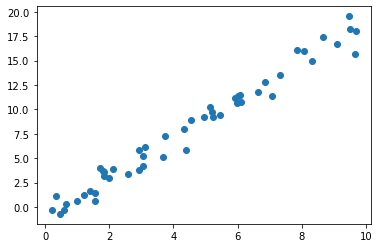

In [59]:
#Example 1
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)

x
len(x)
y


In [64]:
#1
from sklearn.linear_model import LinearRegression
#2 

model = LinearRegression(fit_intercept=True)


#3 Transform data
X = x.reshape((-1, 1))


#4 fit the model
fit = model.fit(X,y)

#Extract intercept & coefficient
print('Coef:',fit.coef_)
print('Intercept:',fit.intercept_)

#plt.scatter(x,y)

#Predict value
newy = fit.predict(X)


Coef: [1.9776566]
Intercept: -0.9033107255311164


array([ 6.50380666e+00,  1.78985535e+01,  1.35730158e+01,  1.09360983e+01,
        2.18220222e+00,  2.18172520e+00,  2.45383664e-01,  1.62266790e+01,
        1.09846800e+01,  1.30999333e+01, -4.96220115e-01,  1.82781755e+01,
        1.55595461e+01,  3.29602771e+00,  2.69256274e+00,  2.72380067e+00,
        5.11355607e+00,  9.47456948e+00,  7.63907845e+00,  4.85620159e+00,
        1.11970384e+01,  1.85539882e+00,  4.87430720e+00,  6.34206845e+00,
        8.11618742e+00,  1.46247735e+01,  3.04555101e+00,  9.26648059e+00,
        1.08126151e+01,  1.53189275e-02,  1.11118401e+01,  2.46907086e+00,
        3.83186397e-01,  1.78623867e+01,  1.81935749e+01,  1.50840128e+01,
        5.12090359e+00,  1.02830828e+00,  1.26284689e+01,  7.80139412e+00,
        1.51018648e+00,  8.88958812e+00, -2.23223868e-01,  1.70799242e+01,
        4.21446866e+00,  1.21991050e+01,  5.26126394e+00,  9.38184882e+00,
        9.90874120e+00,  2.75247562e+00])

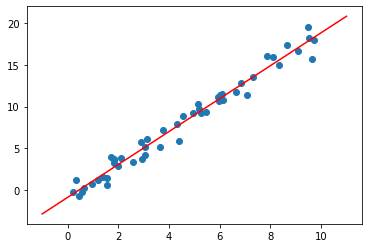

In [71]:
#Predict unknown data

xfit = np.linspace(-1, 11)
xfit

#Transform data
Xfit = xfit.reshape((-1, 1))
Xfit.shape

#Predict xfit with trained ols model
yfit = fit.predict(Xfit)
yfit

#plot them
plt.plot(xfit, yfit,color ='red')
plt.scatter(x,y)

In [81]:
#multidimensional linear models
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])



model = LinearRegression()
model.fit(X,y)
model.coef_
model.intercept_

#R squared 
model.score(X,y)

1.0

In [82]:
#Polynomial Regression
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])

x.shape

(6, 1)

In [84]:
#Fit the data with linear regression

model = LinearRegression()
model.fit(x,y)
model.score(x,y)

0.4065969428801287

In [91]:
#2 Transform input data
#include 𝑥² as an additional feature when implementing polynomial regression

#degree: the degree of the polynomial regression function
poly = PolynomialFeatures(degree = 2, include_bias = False)
poly.fit(x)

#Transform data to a modified input array with fit_transform
#The modified input array contains two columns: 
#one with the original inputs and the other with their squares
newx = poly.fit_transform(x)
newx


array([[   5.,   25.],
       [  15.,  225.],
       [  25.,  625.],
       [  35., 1225.],
       [  45., 2025.],
       [  55., 3025.]])

In [89]:
#3 Fit the linear model

model = LinearRegression()
model.fit(newx, y)
model.score(newx, y)

0.8908516262498563

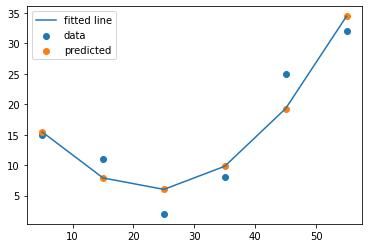

In [97]:
#Predict response
ypred = model.predict(newx)
ypred

#Plot origional data, predicted data and the fitted line
plt.scatter(x,y, label = 'data')
plt.scatter(x,ypred, label = 'predicted')
plt.plot(x, ypred, label = 'fitted line')
plt.legend(loc = 'best')

In [100]:
#Advanced Linear Regression With statsmodels
#https://www.statsmodels.org/stable/user-guide.html#other-models
import statsmodels.api as sm

x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)
x.shape
y.shape

(8,)

In [101]:
#Add the column of ones to x with add_constant

newx = sm.add_constant(x)
newx
# the first column of ones (corresponding to 𝑏₀ and replacing the intercept) 
#as well as two columns of the original features


array([[ 1.,  0.,  1.],
       [ 1.,  5.,  1.],
       [ 1., 15.,  2.],
       [ 1., 25.,  5.],
       [ 1., 35., 11.],
       [ 1., 45., 15.],
       [ 1., 55., 34.],
       [ 1., 60., 35.]])

In [107]:
#The regression model based on ordinary least squares is 
#an instance of the class statsmodels.regression.linear_model.OLS. 

model = sm.OLS(y, x)
results = model.fit()

#model = sm.OLS(y,x).fit()
results
print(results.summary())

#Extract values
print(results.params)
print(results.rsquared)
print(results.rsquared_adj)
print(results.bse)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                              57.86
Date:                Tue, 03 May 2022   Prob (F-statistic):                    0.000120
Time:                        15:34:14   Log-Likelihood:                         -25.398
No. Observations:                   8   AIC:                                      54.80
Df Residuals:                       6   BIC:                                      54.96
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/yuqianliu/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [119]:
#Method 2 
#Fit linear model with formula
import seaborn as sns
import statsmodels.formula.api as smf

tips = sns.load_dataset('tips')

results = smf.ols('total_bill ~ tip + size ', data = tips).fit()

print(results.summary())

#tips

                            OLS Regression Results                            
Dep. Variable:             total_bill   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     147.8
Date:                Tue, 03 May 2022   Prob (F-statistic):           1.31e-42
Time:                        15:41:39   Log-Likelihood:                -781.54
No. Observations:                 244   AIC:                             1569.
Df Residuals:                     241   BIC:                             1580.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6073      1.168      1.376      0.1

In [120]:
#Logistic Regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [137]:
#Import data
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

#Create a logit model and fit the model
logit = LogisticRegression(solver = 'liblinear', random_state = 0)
logit.fit(x,y)

logit.coef_
logit.intercept_
#Evaluate the model with predict_proba

logit.predict_proba(x)
#The first column is the probability of the predicted output being zero, that is 1 - 𝑝(𝑥). 
#The second column is the probability that the output is one, or 𝑝(𝑥).

#Actual prediction
predy = logit.predict(x)

print(predy)
print(y)

[0 0 0 1 1 1 1 1 1 1]
[0 0 0 0 1 1 1 1 1 1]


In [140]:
#the accuracy of your model is equal to 9/10=0.9, which you can obtain with .score():
logit.score(x,y)

#Confusion matrix
#True negatives in the upper-left position
#False negatives in the lower-left position
#False positives in the upper-right position
#True positives in the lower-right position

confusion_matrix(y, logit.predict(x))
#print(classification_report(y, logit.predict(x)))



array([[3, 1],
       [0, 6]])

In [144]:
#Logistic regression with .Logit
#Try statsmodels
import statsmodels.api as sm
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

x = sm.add_constant(x)
model = sm.Logit(y, x)
result = model.fit(method = 'bfgs')
print(result.summary())

result.params


#results.pred_table()

Optimization terminated successfully.
         Current function value: 0.350471
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   10
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            1
Date:                Thu, 05 May 2022   Pseudo R-squ.:                  0.4263
Time:                        15:01:15   Log-Likelihood:                -3.5047
converged:                       True   LL-Null:                       -6.1086
Covariance Type:            nonrobust   LLR p-value:                   0.02248
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9729      1.737     -

array([-1.9728597,  0.8224152])

In [146]:
#Example
#https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv

import pandas as pd
file = 'https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv'

data = pd.read_csv(file)
data


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


### Input variables
1. age (numeric)
2. job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
3. marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)
4. education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
5. default: has credit in default? (categorical: “no”, “yes”, “unknown”)
6. housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
7. loan: has personal loan? (categorical: “no”, “yes”, “unknown”)
8. contact: contact communication type (categorical: “cellular”, “telephone”)
9. month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
10. day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)
16. emp.var.rate: employment variation rate — (numeric)
17. cons.price.idx: consumer price index — (numeric)
18. cons.conf.idx: consumer confidence index — (numeric)
19. euribor3m: euribor 3 month rate — (numeric)
20. nr.employed: number of employees — (numeric)

- y: has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”)

In [147]:
data.shape
data.dropna(inplace = True)
data.shape


(41188, 21)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp_var_rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons_price_idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons_conf_idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr_employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


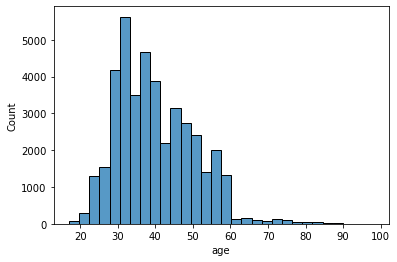

In [151]:
#Data exploration
import seaborn as sns

#count 0 & 1 in the y column & plot the count
data.groupby('y').count()

#histogram for age
sns.histplot(x = 'age', data= data, bins = 30)

#Correlation matrix
data.corr()

In [180]:
#Select only part of the data to run logistical regression
print(data.keys())

x = data[['age','job','duration','pdays']]
x
y = data['y']
y
print(x.shape);
print(y.shape)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')
(41188, 4)
(41188,)


In [181]:
#Create dummy variables with get_dummies
#cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

x = pd.get_dummies(x, columns = ['job'], drop_first = True)
x


,age,duration,pdays,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,44,210,999,1,0,0,0,0,0,0,0,0,0,0
1,53,138,999,0,0,0,0,0,0,0,0,1,0,0
2,28,339,6,0,0,0,1,0,0,0,0,0,0,0
3,39,185,999,0,0,0,0,0,0,1,0,0,0,0
4,55,137,3,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,222,999,0,0,0,0,1,0,0,0,0,0,0
41184,31,196,999,0,0,1,0,0,0,0,0,0,0,0
41185,42,62,999,0,0,0,0,0,0,0,0,0,0,0
41186,48,200,999,0,0,0,0,0,0,0,0,1,0,0


In [183]:
#implementing logit model

x = sm.add_constant(x)
model = sm.Logit(y,x)
result2 = model.fit()
print(result2.summary())


Optimization terminated successfully.
         Current function value: 0.253761
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41173
Method:                           MLE   Df Model:                           14
Date:                Thu, 05 May 2022   Pseudo R-squ.:                  0.2791
Time:                        15:41:15   Log-Likelihood:                -10452.
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.6308      0.103     -6.096      0.000      -0.834      -0.428
age     

/Users/yuqianliu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
